<a href="https://colab.research.google.com/github/kavita1910/Natural-Scene-Classification-using-Tensorflow/blob/main/Natural_Scene_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Scene Classification
Images are classified into 6 classes : 
- building
- street
- glacier
- forest
- mountain

**Aim:** Build a model which can classify these Natural Scenes with the highest accuracy possible.

**Steps:** 
- load the data
- preparing data for modelling
- creating a CNN model (starting with the baseline)
- fitting the model (getting it to find patterns in the data)
- evaluatig the model
- improvising the model
- Making predictions with the trained model

**Experiments:** 


## Load the data
- download the zip file from drive
- create an unzip function to unzip the downloaded file

In [1]:
! gdown --id 1cb0-HdobqDGGxMiiqAdmbO2jjKNKm-z0

Downloading...
From: https://drive.google.com/uc?id=1cb0-HdobqDGGxMiiqAdmbO2jjKNKm-z0
To: /content/NaturalSceneClassification.zip
100% 254M/254M [00:03<00:00, 81.4MB/s]


In [2]:
# create a function to unzip the zipfile into current working directory
import zipfile

def unzip_data(filename):
  """
  Unzip filename into current working directory.
  Args:
    filename (str): a filepath to target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, 'r')
  zip_ref.extractall()
  zip_ref.close()

In [3]:
unzip_data("/content/NaturalSceneClassification.zip")

## Inspect the data
scanning the folder & understanding the data you are working with 
- A **train** directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
- A **test** directory with the same structure as the train directory.

In [4]:
# Walk through an image classification directory and find out how many files (images) are in each subdirectory
import os

def walk_through_dir(dir_path):
  """
  Walk through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of :
      number of subdirectories in dir_path
      number of images(files) in each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"They are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir("NaturalSceneClassification")

They are 2 directories and 0 images in 'NaturalSceneClassification'.
They are 6 directories and 0 images in 'NaturalSceneClassification/seg_test'.
They are 0 directories and 553 images in 'NaturalSceneClassification/seg_test/glacier'.
They are 0 directories and 474 images in 'NaturalSceneClassification/seg_test/forest'.
They are 0 directories and 510 images in 'NaturalSceneClassification/seg_test/sea'.
They are 0 directories and 501 images in 'NaturalSceneClassification/seg_test/street'.
They are 0 directories and 525 images in 'NaturalSceneClassification/seg_test/mountain'.
They are 0 directories and 437 images in 'NaturalSceneClassification/seg_test/buildings'.
They are 6 directories and 0 images in 'NaturalSceneClassification/seg_train'.
They are 0 directories and 2404 images in 'NaturalSceneClassification/seg_train/glacier'.
They are 0 directories and 2271 images in 'NaturalSceneClassification/seg_train/forest'.
They are 0 directories and 2274 images in 'NaturalSceneClassification/

In [6]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/NaturalSceneClassification/seg_train")  

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Create a list of class names from the subdirectories names 
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


## Visualize random images from the dataset
create a function that loads up a random image from the dataset of a specified class

In [7]:
# View an image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory from which we will view our image
  target_folder = target_dir + target_class

  # Get random image path 
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  # show the shape of the image

  return img

Image shape: (150, 150, 3)


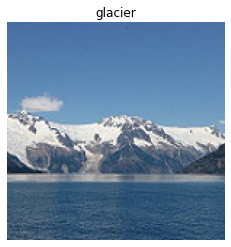

In [8]:
# View a random image from a training dataset
img = view_random_image(target_dir="/content/NaturalSceneClassification/seg_train/",
                        target_class="glacier")

In [9]:
# View the img in the array/tensor form
img

array([[[ 70, 110, 162],
        [ 70, 110, 162],
        [ 70, 110, 162],
        ...,
        [ 75, 115, 164],
        [ 75, 115, 164],
        [ 75, 115, 164]],

       [[ 71, 111, 162],
        [ 71, 111, 162],
        [ 71, 111, 162],
        ...,
        [ 75, 115, 164],
        [ 76, 116, 165],
        [ 75, 115, 164]],

       [[ 71, 111, 162],
        [ 71, 111, 162],
        [ 71, 111, 162],
        ...,
        [ 76, 116, 165],
        [ 76, 116, 165],
        [ 76, 116, 165]],

       ...,

       [[ 66,  94, 118],
        [ 89, 113, 139],
        [ 57,  77, 104],
        ...,
        [ 49,  83, 118],
        [ 52,  88, 122],
        [ 56,  92, 128]],

       [[ 78, 106, 130],
        [ 63,  87, 113],
        [ 71,  91, 118],
        ...,
        [ 46,  81, 113],
        [ 34,  70, 104],
        [ 24,  60,  96]],

       [[ 20,  48,  72],
        [ 45,  69,  95],
        [ 55,  75, 102],
        ...,
        [ 41,  76, 108],
        [ 51,  85, 120],
        [ 56,  92, 126]]

In [10]:
# View the image shape
img.shape # return (height, width, color channels)

(150, 150, 3)

Notice that all the 'img' values are between 0 and 255. This is because that's the possible range for blue, green and red values.

So when building a model it diffrentiates between our different classes it will be finding patterns in these different pixel values which determine what each class looks like.

## Preprocess the data (prepare it for the model)

Many ML models including neural network prefer the values to be between 0 and 1. This is the most common preprocessing step for working with images i.e. to **scale** images also referred to as **normalization**. This is done by dividing each pixel value in the image array by 255. 

In [ ]:
# Get all the pixel values between 0-1
img/255.

array([[[0.8       , 0.83529412, 0.87058824],
        [0.81176471, 0.85098039, 0.88627451],
        [0.81568627, 0.85490196, 0.89019608],
        ...,
        [0.91372549, 0.94117647, 0.96470588],
        [0.89803922, 0.93333333, 0.96078431],
        [0.88627451, 0.92941176, 0.95294118]],

       [[0.82352941, 0.8627451 , 0.90196078],
        [0.83529412, 0.8745098 , 0.91372549],
        [0.83921569, 0.87843137, 0.91764706],
        ...,
        [0.84705882, 0.87843137, 0.92156863],
        [0.83529412, 0.86666667, 0.90980392],
        [0.82745098, 0.86666667, 0.91372549]],

       [[0.82352941, 0.8627451 , 0.90196078],
        [0.83137255, 0.87058824, 0.90980392],
        [0.83137255, 0.87058824, 0.90980392],
        ...,
        [0.80784314, 0.83529412, 0.89803922],
        [0.79607843, 0.82352941, 0.88627451],
        [0.78823529, 0.82352941, 0.89019608]],

       ...,

       [[0.16862745, 0.17647059, 0.17254902],
        [0.23921569, 0.24705882, 0.24313725],
        [0.11764706, 0

A **batch** is a small subset of the dataset a model looks at during training. For e.g.: rather than looking at 10,000 images at one time and trying to figure out the patterns a model might only look at 32 images at a time.

It does this for a couple of reasons:    
- 10,000 images (or more) might not fit into the memory of your processor(GPU).
- Trying to learn patterns in 10,000 images in one hit could result in the model not being able to learn very well.

To turn data into batches first create an instance of `ImageDataGenerator` for each of the datasets.

The `ImageDataGenerator` class helps prepare the images into batches as well as perform transformations on them as they get loaded into the model.

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Pre-process the data (get all of the pixel values between 0 and 1 also called scaling and normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup train and test directories
train_dir = "/content/NaturalSceneClassification/seg_train"
test_dir = "/content/NaturalSceneClassification/seg_test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(150,150),  # convert all images to 150x150
                                               class_mode='categorical')

test_data =test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(150,150),
                                            class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Training data has 14034 images of 6 classes and test data has 3000 also belonging to 6 classes.

Take a look at the batched images and labels by inspecting the `train_data` object.

In [12]:
images, labels = train_data.next()  # gets the next batch of images/labels
len(images), len(labels)

(32, 32)

In [13]:
# Get the 1st two images
images[:2], images[0].shape

(array([[[[0.7568628 , 0.80392164, 0.86666673],
          [0.7568628 , 0.80392164, 0.86666673],
          [0.7568628 , 0.80392164, 0.86666673],
          ...,
          [0.7803922 , 0.82745105, 0.8745099 ],
          [0.80392164, 0.85098046, 0.8980393 ],
          [0.77647066, 0.8235295 , 0.8705883 ]],
 
         [[0.75294125, 0.8000001 , 0.86274517],
          [0.75294125, 0.8000001 , 0.86274517],
          [0.7568628 , 0.80392164, 0.86666673],
          ...,
          [0.8000001 , 0.83921576, 0.8862746 ],
          [0.80392164, 0.8431373 , 0.89019614],
          [0.79215693, 0.8313726 , 0.87843144]],
 
         [[0.7490196 , 0.7960785 , 0.8588236 ],
          [0.7490196 , 0.7960785 , 0.8588236 ],
          [0.75294125, 0.8000001 , 0.86274517],
          ...,
          [0.8000001 , 0.8313726 , 0.8745099 ],
          [0.78823537, 0.8196079 , 0.86274517],
          [0.7960785 , 0.82745105, 0.8705883 ]],
 
         ...,
 
         [[0.54901963, 0.61960787, 0.6745098 ],
          [0.65882

In [14]:
# View the first batch of labels
labels

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1.

In [15]:
images = tf.image.resize(images, [224,224])

In [16]:
images.shape

TensorShape([32, 224, 224, 3])

## Create modelling callbacks
Since training on a large amount of data and training could take a long time, it's a good idea to set up some modelling callbacks to be sure of things like model's training logs being tracked and model being checkpointed (saved) after various training milestones.

To do each of these use the following callbacks:

`tf.keras.callbacks.TensorBoard()` - allows us to keep track of our model's training history so we can inspect it later

In [17]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=1) # don't print out whether or not model is being saved 

## Create a model (start with a baseline)

Components of a convolutional neural network:

| Syntax            | Description | Test Text     |
| :---              |    :----:   |          ---: |
| Input image(s)      | Target images you'd like to discover pattern in | Whatever you can take photo or video of   |
| Input layer       | Takes in target images and pre-process them for further layers | input_shape = [batch_size, image_height, image_width, color_channels] |
| Convolution layer | Extract/learns the most important features from target images | Multiple, can create with `tf.keras.layers.ConvXD` (X can be multiple values) |
| Hidden activation layer | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`tf.keras.activations.relu`) |
| Pooling layer | Reduces the dimentionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully conntected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` |
| Output activation | Adds non-linearity to output layer | `tf.keras.activations.sigmoid` for binary classifications & `tf.keras.activations.softmax` for multi-class. |

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
                      Conv2D(6, 3, activation="relu", input_shape=(150, 150, 3)),
                      Conv2D(6, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(6, 3, activation="relu"),
                      Conv2D(6, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(6, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [28]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa16267b8d0>>

## Fit a model

In [29]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 34s 74ms/step - loss: 1.0038 - accuracy: 0.6032 - val_loss: 0.9432 - val_accuracy: 0.6293
Epoch 2/5
439/439 [==============================] - 30s 67ms/step - loss: 0.7688 - accuracy: 0.7052 - val_loss: 0.7661 - val_accuracy: 0.7023
Epoch 3/5
439/439 [==============================] - 25s 56ms/step - loss: 0.6850 - accuracy: 0.7401 - val_loss: 0.7789 - val_accuracy: 0.7153
Epoch 4/5
439/439 [==============================] - 25s 56ms/step - loss: 0.6132 - accuracy: 0.7717 - val_loss: 0.7297 - val_accuracy: 0.7433
Epoch 5/5
439/439 [==============================] - 33s 76ms/step - loss: 0.5434 - accuracy: 0.7983 - val_loss: 0.7675 - val_accuracy: 0.7317


To inspect models training performance plot accuracy and loss curve.

In [30]:
# Plot the validation and training data seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epoch') 
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

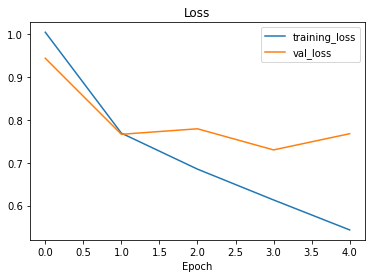

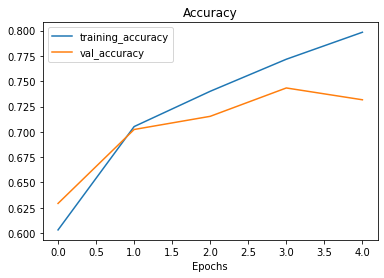

In [31]:
plot_loss_curves(history_1)

That's quite the gap between the training and validation loss curves.

The curve first converges and diverges which tells us that the model is **overfitting** the training set badly. In other words its getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

**Note:** When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

## Adjust the model parameters
A couple of ways to overfit our model include :
- Get more data: Having more data gives opportunity for the model to learn patterns which maybe more generalized to new examples.
- Simplify the model: If current model is already overfitting the training data, it maybe to complicated for the model. This means it is learning patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify the model is to reduce number of layers it uses or to reduce number of hidden units in each layer.
- Using data augmentation: Data Augmentation manipulates the training data in way that its harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model maybe able to generalize better to unseen data.
- Using Transfer Learning: Transfer learning involves leverages the patterns (also called pre-trained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on large variety of images and then tweak it slightly to be more specialized for scenic images.

**Note:** Preventing overfitting is also referred to as regularization.

Since collecting more data is not possible.
Try the other three options.

Simplify `model_1` by removing 2 convolutional layers.




In [32]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(6, 3, activation='relu', input_shape=(150, 150, 3)),
  MaxPool2D(),
  Conv2D(6, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(6, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 23s 50ms/step - loss: 1.0855 - accuracy: 0.5910 - val_loss: 0.9098 - val_accuracy: 0.6637
Epoch 2/5
439/439 [==============================] - 22s 50ms/step - loss: 0.8257 - accuracy: 0.6981 - val_loss: 0.8442 - val_accuracy: 0.6813
Epoch 3/5
439/439 [==============================] - 22s 50ms/step - loss: 0.7180 - accuracy: 0.7383 - val_loss: 0.7754 - val_accuracy: 0.7140
Epoch 4/5
439/439 [==============================] - 23s 51ms/step - loss: 0.6294 - accuracy: 0.7769 - val_loss: 0.7324 - val_accuracy: 0.7347
Epoch 5/5
439/439 [==============================] - 22s 49ms/step - loss: 0.5457 - accuracy: 0.8108 - val_loss: 0.8244 - val_accuracy: 0.7127


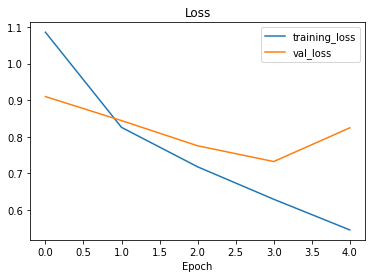

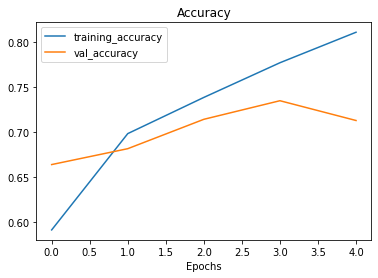

In [33]:
plot_loss_curves(history_2)

Let's do another modelling experiment. 

**`Data Augmentation`** makes it harder for the model to learn on the training data and in turn hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data create a new `ImageDataGenerator` instance this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate the images.

In [34]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(150, 150),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 14034 images belonging to 6 classes.


Let's see how the augmented data works with the same model as before `model_2`.

Rather than rewrite the model from scratch clone it using a handy function in TensorFlow called `clone_model` which can existing model and rebuild it in the same format.

The cloned version will not include any of the weights(patterns) the original model has learned. So when we train it, it'll be training a model from scratch.

In [35]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_10)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 94s 211ms/step - loss: 1.1681 - accuracy: 0.5435 - val_loss: 1.1042 - val_accuracy: 0.5887
Epoch 2/5
439/439 [==============================] - 90s 206ms/step - loss: 1.0087 - accuracy: 0.6161 - val_loss: 1.0095 - val_accuracy: 0.6597
Epoch 3/5
439/439 [==============================] - 90s 204ms/step - loss: 0.9677 - accuracy: 0.6411 - val_loss: 0.8268 - val_accuracy: 0.6933
Epoch 4/5
439/439 [==============================] - 92s 210ms/step - loss: 0.9349 - accuracy: 0.6490 - val_loss: 0.8557 - val_accuracy: 0.7063
Epoch 5/5
439/439 [==============================] - 93s 211ms/step - loss: 0.9169 - accuracy: 0.6575 - val_loss: 0.8287 - val_accuracy: 0.7070


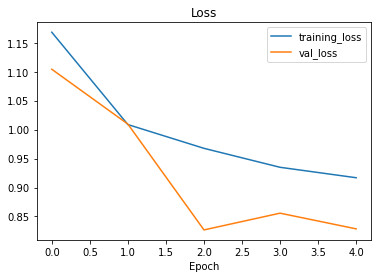

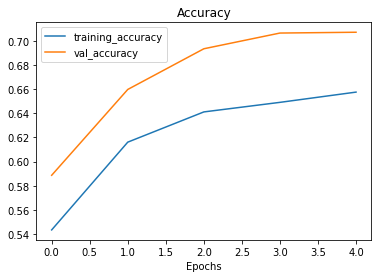

In [36]:
plot_loss_curves(history_3)

## Transfer Learning
Since this is an image dataset, our target are the models which perform best on ImageNet.
There are 3 types of Transfer Learning:
1. **As is** Transfer Learning: is when you take a pretrained model as it is and apply it to your task without any changes.
  - For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class).

    - This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with "/classification" in their name on TensorFlow Hub provide this kind of functionality.
2. **Feature extraction** transfer learning:  is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem.

  - For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that only the top few layers become trainable, the rest remain frozen.

    - This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.
3. **Fine-tuning** transfer learning is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem.

  - This usually means training some, many or all of the layers in the pretrained model. This is useful when you've got a large dataset (e.g. 100+ images per class) where your data is slightly different to the data the original model was trained on.

A common workflow is to "freeze" all of the learned patterns in the bottom layers of a pretrained model so they're untrainable. And then train the top 2-3 layers of so the pretrained model can adjust its outputs to your custom data (feature extraction).

After you've trained the top 2-3 layers, you can then gradually "unfreeze" more and more layers and run the training process on your own data to further fine-tune the pretrained model.
>  **Question:** Why train only the top 2-3 layers in feature extraction?

The lower a layer is in a computer vision model as in, the closer it is to the input layer, the larger the features it learn. For example, a bottom layer in a computer vision model to identify images of cats or dogs might learn the outline of legs, where as, layers closer to the output might learn the shape of teeth. Often, you'll want the larger features (learned patterns are also called features) to remain, since these are similar for both animals, where as, the differences remain in the more fine-grained features.

The typical order for using transfer learning is:

1. Build a feature extraction model (replace the top few layers of a pretrained model)
2. Train for a few epochs with lower layers frozen
3. Fine-tune if necessary with multiple layers unfrozen

To build a feature extractor model we'll:

- Use `EfficientNetB0` from `tf.keras.applications` pre-trained on ImageNet as  base model
- Download this without the top layers using `include_top = False` parameter so we can create own output layers.
- Freeze the base model layers so we can use the pre-learned patterns the base model has found on ImageNet
- Put together the input, base model, pooling and output layers in a Functional model
- Compile the Functional model using the Adam optimizer and sparse categorical crossentropy as the loss function (since our labels aren't one-hot encoded)
- Fit the model for 3 epochs using the TensorBoard and ModelCheckpoint callbacks





In [37]:
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [38]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB0

Since input resolution of image for the EfficientNetB0 model is 224 let's resize the images.

In [39]:
input_shape = (224, 224, 3)

In [43]:
efficientnet_model = tf.keras.applications.EfficientNetB0(include_top=False)
efficientnet_model.trainable = True # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer", dtype=tf.float16)
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = efficientnet_model(inputs, training=True) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", name="softmax")(x) 
model_4 = tf.keras.Model(inputs, outputs)

# Compile the model
model_4.compile(loss="categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [44]:
model_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_5 (Dense)             (None, 6)                 7686      
                                                                 
 softmax (Activation)        (None, 6)                 0         
                                                                 
Total params: 4,057,257
Trainable params: 4,015,234
Non-trainable params: 42,023
____________________________________________

In [46]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [48]:
# Fit the model 
history_efficientnet_model = model_4.fit(train_data, 
                                       epochs=100,
                                       steps_per_epoch=len(train_data),
                                       validation_data=test_data,
                                       validation_steps=len(test_data),
                                       callbacks=[early_stopping,  # stop model after X epochs of no improvements
                                                                   model_checkpoint, # save only the best model during training
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Epoch 1/100
439/439 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9104INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 [==============================] - 282s 642ms/step - loss: 0.2643 - accuracy: 0.9104 - val_loss: 0.2802 - val_accuracy: 0.8983 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/100
439/439 [==============================] - 161s 367ms/step - loss: 0.2132 - accuracy: 0.9264 - val_loss: 0.3360 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 3/100
439/439 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9408
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
439/439 [==============================] - 161s 367ms/step - loss: 0.1718 - accuracy: 0.9408 - val_loss: 0.2927 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/100
439/439 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9723INFO:tensorflow:Assets written to: fine_tune_checkpoints/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


439/439 [==============================] - 221s 503ms/step - loss: 0.0835 - accuracy: 0.9723 - val_loss: 0.2644 - val_accuracy: 0.9157 - lr: 2.0000e-04
Epoch 5/100
439/439 [==============================] - 161s 367ms/step - loss: 0.0429 - accuracy: 0.9848 - val_loss: 0.2821 - val_accuracy: 0.9183 - lr: 2.0000e-04
Epoch 6/100
439/439 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9915
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
439/439 [==============================] - 162s 368ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.3055 - val_accuracy: 0.9213 - lr: 2.0000e-04
Epoch 7/100
439/439 [==============================] - 162s 368ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.2921 - val_accuracy: 0.9243 - lr: 4.0000e-05


In [49]:
# Evaluate model (unsaved version) on whole test dataset
results_efficientnet_model = model_4.evaluate(test_data)
results_efficientnet_model

94/94 [==============================] - 9s 92ms/step - loss: 0.3058 - accuracy: 0.9187


[0.30577459931373596, 0.918666660785675]